In [1]:
import utils.ansatz as ansatz
from qiskit.visualization import plot_distribution
from utils.backends import qw_contralto, ibm_5q, ibm_127q
from utils.noise_models import qe_noise_model, th_noise_model, ro_noise_model
from qiskit import transpile

/Users/stefan.kister/opt/virtual/quiskit_v10x/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [17]:
num_qubits = 5
ghz = ansatz.ghz_circuit(num_qubits)

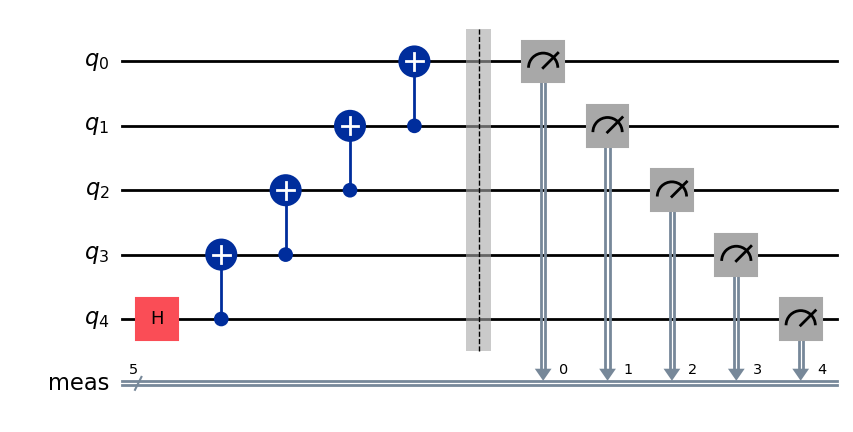

In [18]:
ghz.draw('mpl')

In [19]:
backend = ibm_5q()

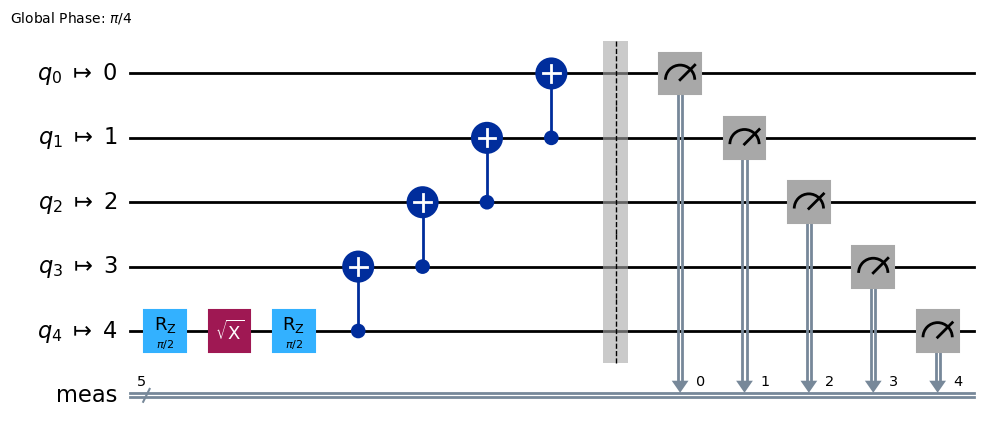

In [20]:
ghz_trans = transpile(ghz, backend, optimization_level=1)

ghz_trans.draw('mpl')


In [21]:
job = backend.run(ghz_trans, shots=8000)
result = job.result()
counts=result.get_counts()
print(counts)

{'01010': 1, '01100': 1, '10001': 1, '00011': 2, '01001': 3, '11000': 6, '00111': 6, '10100': 4, '01000': 36, '10101': 7, '00101': 7, '10010': 8, '01111': 103, '00010': 38, '11011': 142, '11001': 3, '10000': 25, '11101': 83, '10110': 33, '11111': 2541, '10011': 6, '01110': 38, '11100': 61, '10111': 114, '00001': 228, '11010': 51, '01011': 8, '11110': 734, '00100': 63, '00000': 3647}


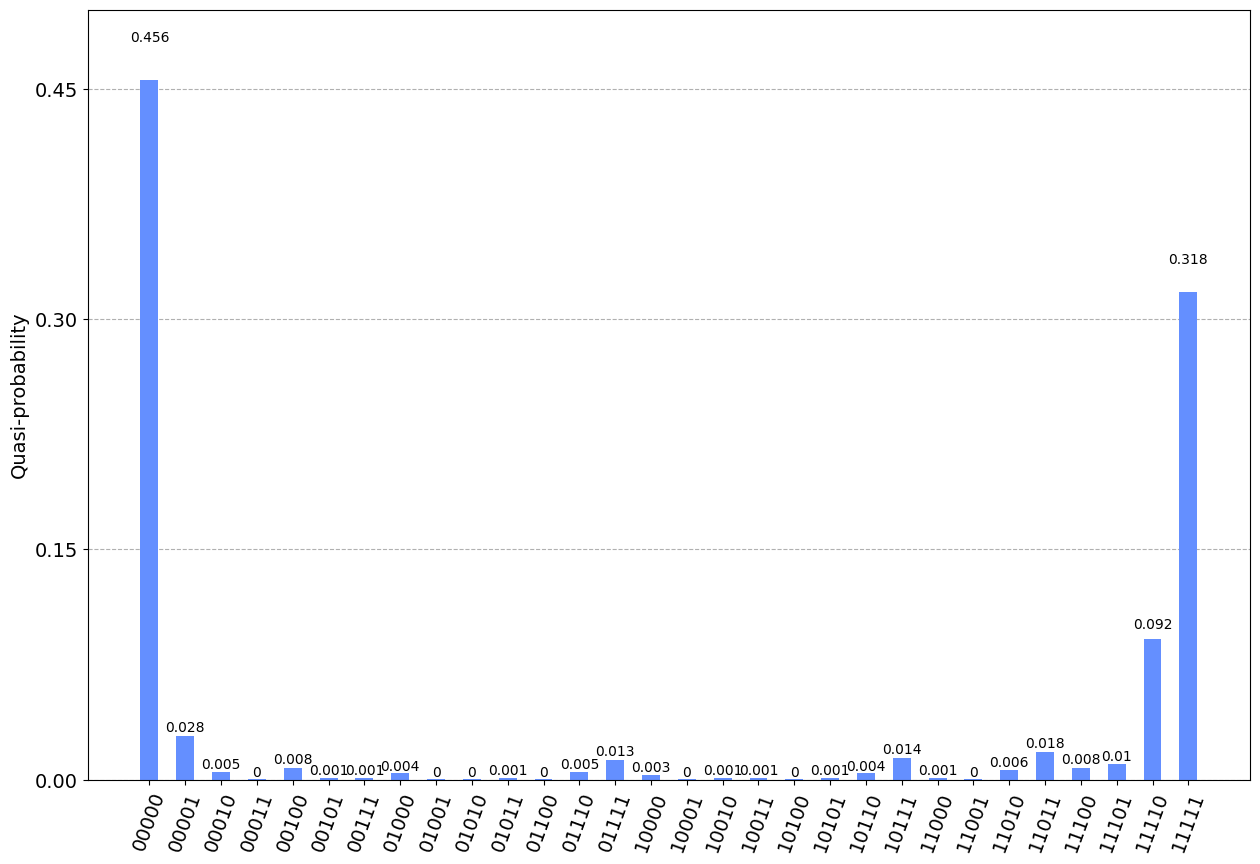

In [22]:
plot_distribution(counts, figsize=(15, 10))

In [23]:
# Defining Quantum Error Noise Model
# Depolarization Error
q1_gate_err = 0.01
q2_gate_err = 0.01

# Pauli Error
reset_error = 0.05
meas_error = 0.05
gate1_error = 0.01

qe_nm = qe_noise_model(q1_gate_err,q2_gate_err, reset_error, meas_error, gate1_error)


In [24]:
job = backend.run(ghz_trans, noise_model=qe_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Quantum Error Noise Model")
print(counts)

GHZ with Quantum Error Noise Model
{'10110': 6, '11000': 5, '01011': 8, '10001': 10, '00001': 157, '11010': 6, '00101': 10, '10101': 8, '10010': 7, '10100': 9, '00111': 5, '11110': 172, '01001': 13, '11011': 181, '01110': 8, '10011': 7, '01111': 165, '10111': 167, '01101': 14, '00011': 12, '01100': 8, '00100': 143, '01010': 14, '11100': 13, '01000': 163, '11001': 11, '10000': 150, '00110': 3, '11101': 163, '00010': 152, '00000': 3113, '11111': 3097}


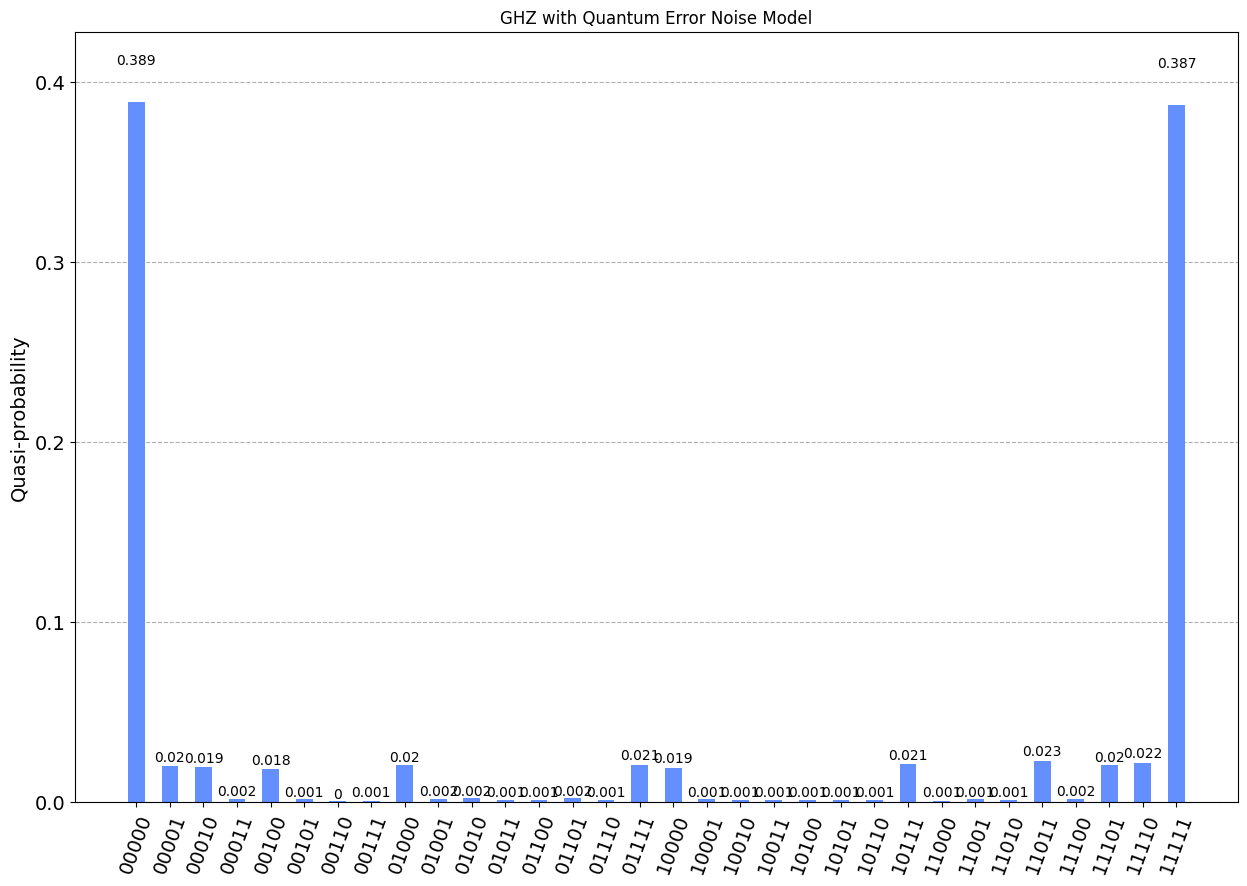

In [25]:
plot_distribution(counts, title="GHZ with Quantum Error Noise Model", figsize=(15, 10))

In [26]:
# Defining Thermal Noise Model
import numpy as np

# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, num_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, num_qubits)  # Sampled from normal distribution mean 50 microsec

# Approximate instruction times (in nanoseconds) from QM data & discussion with Max
time_u1 = 0   # virtual gate
time_u2 = 16  # (single X90 pulse)
time_u3 = 32 # (two X90 pulses)
time_cx = 40
time_reset = 1216  # Feedback, measurement and conditional pulse
time_measure = 1000 # 1 microsecond

th_nm = th_noise_model(num_qubits, T1s, T2s, time_u1, time_u2, time_u3, time_cx, time_reset, time_measure)

In [27]:
job = backend.run(ghz_trans, noise_model=th_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'10101': 2, '10111': 97, '11100': 5, '00111': 3, '11110': 108, '01110': 3, '01011': 3, '11010': 3, '10011': 3, '01101': 2, '01111': 97, '10110': 2, '11111': 3453, '11011': 63, '11001': 2, '10000': 5, '11101': 64, '00000': 4085}


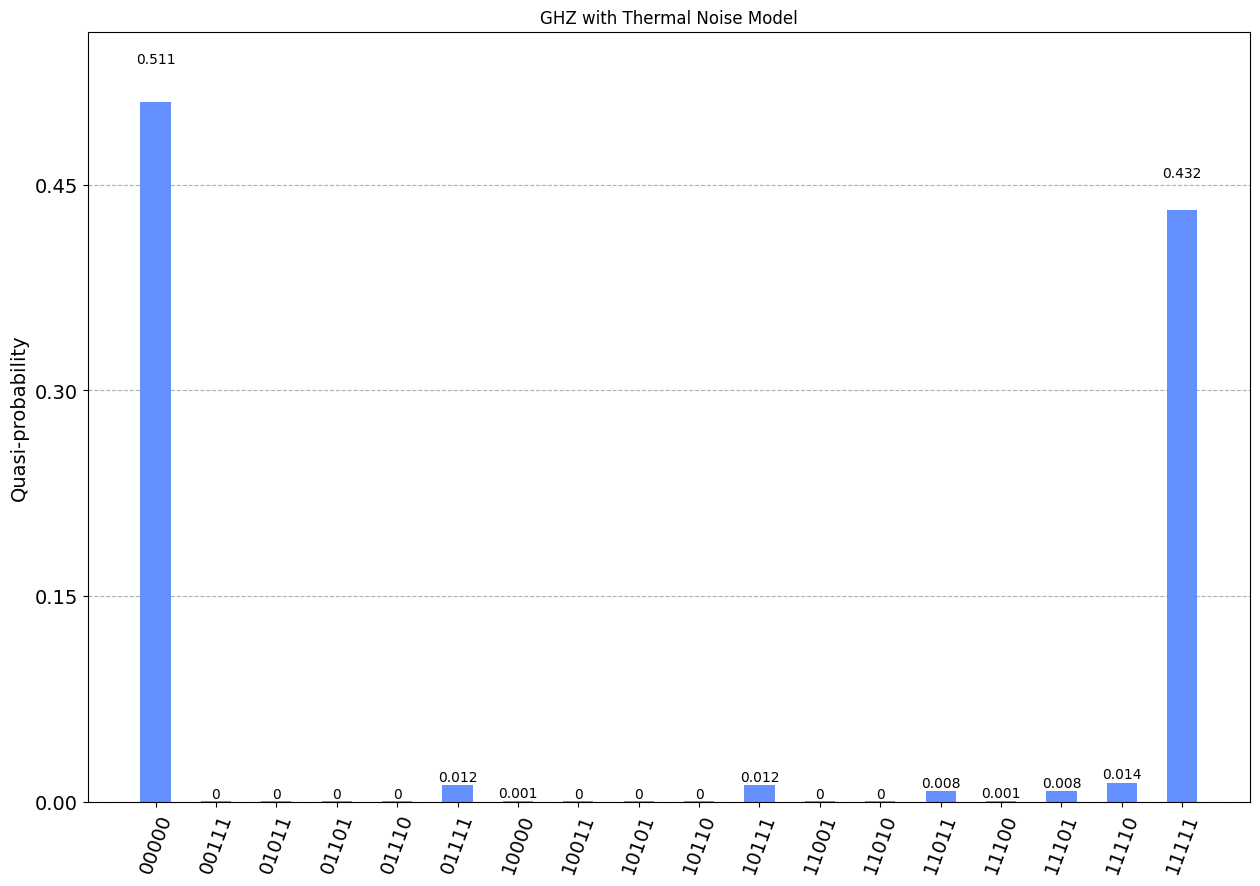

In [28]:
plot_distribution(counts, title="GHZ with Thermal Noise Model", figsize=(15, 10))

In [29]:
# Define Readout Noise Model
# Readout Error
p0given1 = 0.05
p1given0 = 0.05

ro_nm = ro_noise_model(p0given1,p1given0)

In [30]:
job = backend.run(ghz_trans, noise_model=ro_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'01100': 3, '11000': 6, '10010': 9, '01010': 4, '10011': 9, '01110': 12, '00111': 11, '10100': 8, '00101': 9, '10101': 9, '01011': 13, '00001': 170, '11010': 8, '11100': 5, '01101': 6, '10111': 165, '11110': 143, '01111': 162, '00100': 158, '00011': 14, '01001': 14, '11011': 164, '11101': 152, '00110': 9, '10110': 10, '11111': 3072, '10001': 9, '01000': 176, '00010': 167, '11001': 10, '10000': 196, '00000': 3097}


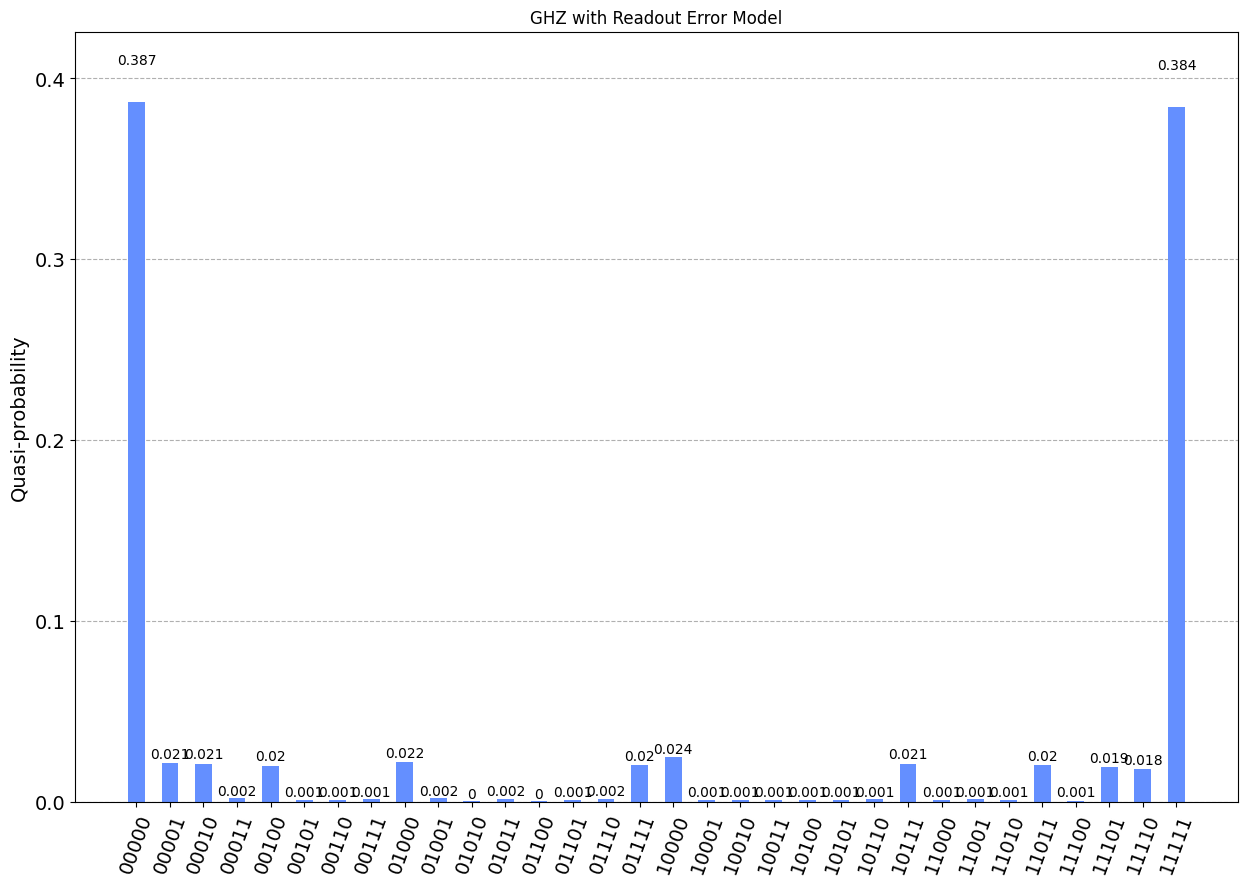

In [31]:
plot_distribution(counts, title="GHZ with Readout Error Model", figsize=(15, 10))